<a href="https://colab.research.google.com/github/rakesh212/Demo3/blob/master/Sentiment_Anlaysis_NW_With_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Necessary packages

In [2]:
!pip install autocorrect 

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

import nltk
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')
stop_words = stopwords.words('english')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data

In [4]:
os.chdir('/content/sample_data')

In [5]:
df1 = pd.read_excel('ReviewsRatings_Nationwide.xlsx',sheet_name=0,)
# df2 = pd.read_excel('ReviewsRatings_Nationwide.xlsx',sheet_name=1)

In [6]:
df1.Reviews[2]

'I changed insurers this month because I did not get customer service that I thought I am entitled to. Would call my previous insurer and would not get a return call from the representative that I started with and I saved a couple hundred dollars with my auto & home policy. Switched from Liberty Mutual to Nationwide.'

# Creating Required Functions

In [7]:
def int_processing(data):
    data.dropna(inplace = True)
    data['Ratings'] = data['Ratings'].astype(int)
    return data

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [spell(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def to_lower(text):
    """
    :param text:
    :return:
        Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return text.lower()

def remove_numbers(text):
    """
    take string input and return a clean text without numbers.
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>', '', text)
    return cleaned_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list = []
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def word_tokenize(text):
    """
    :param text:
    :return: list of words
    """
    return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    """
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [8]:
def preprocess(message):
    message=message.lower()
    sentence_tokens = sentence_tokenize(message)
    word_list = []
    for each_sent in sentence_tokens:
        lemmatizzed_sent = lemma.lemmatize(each_sent)
        clean_text = remove_numbers(lemmatizzed_sent)
        clean_text = remove_punct(clean_text)
        clean_text = remove_Tags(clean_text)
        clean_text = remove_stopwords(clean_text)
        word_tokens = word_tokenize(clean_text)
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [9]:
df_new = int_processing(df1)
df_new.head()

,Reviews,Ratings
0,I've known the staff from Nationwide for 5 yea...,5
1,I have been with them for over 20 years and th...,4
2,I changed insurers this month because I did no...,4
3,Great customer service. Fast claim service. Ev...,5
4,"After shopping around, Nationwide was quite a ...",5


In [10]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop(['Ratings'],axis=1),df1['Ratings'],test_size=0.2 , stratify = df1['Ratings'])

# Model Training and parameter Tunning

In [131]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB
clf = RandomForestClassifier()

In [182]:
# tfidf = TfidfVectorizer(analyzer=preprocess,min_df=20,max_df=3000)
# tfidf_result = tfidf.fit_transform(x_train['Reviews']).toarray()
# tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
# tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
# tfidf_df.index = x_train.index
# new_data = pd.concat([x_train, tfidf_df], axis=1)

In [185]:
new_data.head(2)

,Reviews,word_!,word_$,word_%,word_'',word_'m,word_'re,word_'s,word_'ve,word_(,word_),word_**,"word_,",word_-,word_.,word_...,word_1,word_10,word_2,word_20,word_3,word_4,word_5,word_6,word_?,word_``,word_able,word_accident,word_account,word_actually,word_added,word_adjuster,word_agency,word_agent,word_ago,word_almost,word_also,word_always,word_amount,word_another,...,word_talk,word_tell,word_thing,word_think,word_though,word_thought,word_three,word_ticket,word_time,word_told,word_took,word_total,word_totaled,word_tow,word_tried,word_truck,word_try,word_trying,word_two,word_u,word_understand,word_use,word_used,word_value,word_vehicle,word_wait,word_want,word_wanted,word_way,word_week,word_well,word_went,word_within,word_without,word_work,word_worst,word_would,word_wrong,word_year,word_yet
173,Had to get ins quick so I called Nationwide fi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.320869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.220242,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
113,Overall Nationwide is a great company to work ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164669,0.094649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234623,0.0,0.151907,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.127415,0.0,0.0,0.0,0.0,0.0


In [132]:
param = {'n_estimators' :[100,150,200,300,400,500],
         'max_depth' : [2,4,5,6,8,10],
         'criterion' : ['gini','entropy'],
         'min_samples_split' : [2,3,4,5,6],
         'min_samples_leaf' :[1,2,3,4,5,6],
         'max_features' :['auto', 'sqrt', 'log2']}

In [133]:
rs = RandomizedSearchCV(clf,param_distributions=param,n_jobs=-1,n_iter=10,scoring='roc_auc',cv = 10,
                        verbose=100)

In [ ]:
rs.fit(x_train['Reviews'], y_train)

# Creating Model Pipeline

In [14]:
pipe1=Pipeline([
    
    ('tfidf',TfidfVectorizer(analyzer=preprocess,min_df=10 ,max_df=1000)),
    ('classfier',MultinomialNB())
])

In [15]:
pipe1.fit(x_train['Reviews'],y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function preprocess at 0x7f9b37210378>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1000, max_features=None,
                                 min_df=10, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classfier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [161]:
# pipe1.classes_

array([1, 2, 3, 4, 5])

In [16]:
pred = pipe1.predict(x_test['Reviews'])
pred

array([1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1,
       5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 4, 4, 1, 5, 1, 1, 5, 5, 1, 1, 4, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 4, 1, 5, 1, 1, 5, 1,
       5, 1, 5, 1, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 1, 5, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 5, 4, 5,
       1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 5, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 5, 1, 1, 4, 1, 5, 5, 1, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6789473684210526

In [18]:
df1['Reviews'][2]

'I changed insurers this month because I did not get customer service that I thought I am entitled to. Would call my previous insurer and would not get a return call from the representative that I started with and I saved a couple hundred dollars with my auto & home policy. Switched from Liberty Mutual to Nationwide.'

# Saving my model

In [19]:
from sklearn.externals import joblib
joblib.dump(pipe1,'my_model_pipeline_Nationwide.pkl')

['my_model_pipeline_Nationwide.pkl']

# Loadng my Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
import os
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import nltk
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')
stop_words = stopwords.words('english')

In [103]:
def int_processing(data):
    data.dropna(inplace = True)
    data['Ratings'] = data['Ratings'].astype(int)
    return data

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [spell(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def to_lower(text):
    """
    :param text:
    :return:
        Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return text.lower()

def remove_numbers(text):
    """
    take string input and return a clean text without numbers.
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>', '', text)
    return cleaned_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list = []
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def word_tokenize(text):
    """
    :param text:
    :return: list of words
    """
    return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    """
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [104]:
def preprocess(message):
    message=message.lower()
    sentence_tokens = sentence_tokenize(message)
    word_list = []
    for each_sent in sentence_tokens:
        lemmatizzed_sent = lemma.lemmatize(each_sent)
        clean_text = remove_numbers(lemmatizzed_sent)
        clean_text = remove_punct(clean_text)
        clean_text = remove_Tags(clean_text)
        clean_text = remove_stopwords(clean_text)
        word_tokens = word_tokenize(clean_text)
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [105]:
mymodel=open('my_model_pipeline_Nationwide.pkl','rb')

In [106]:
pipe=joblib.load(mymodel)

In [22]:
x_test['Reviews']

507    A Nationwide policy sideswiped my car when we ...
645    They are not very customer friendly. You need ...
446    All claims have been processed quickly with no...
639    They are reasonably priced and a good company....
381    They walk you through the whole claim process....
                             ...                        
672    Helpful. Sincere. Fair. They go out of their w...
694    Avery has helped me a great deal with the best...
473    I have full coverage Nationwide car insurance ...
827    I am a 53 year-old woman with a perfect drivin...
316    Pay Attention, things aren't always what they ...
Name: Reviews, Length: 190, dtype: object

In [23]:
y_test

507    1
645    2
446    4
639    4
381    5
      ..
672    4
694    5
473    1
827    1
316    1
Name: Ratings, Length: 190, dtype: int64

In [125]:
my_msg=['Cancelled policy without notification: I am 9 months pregnant and my husband and I were trying to cut back financially on cost until I go back to work. We had been with Progressive for over 5 years, but had to leave a great company due to financial issues. Well, Nationwide quoted us an awesome quote very low and we accepted it. We decided to enroll in EasyPay to get the discount on the quote and we set up the account number and routing number and accidentally left one number off the account number. Well, no one notified us in regards to this matter and they cancelled our policy. We didnâ€™t know until we came home to a letter stating we were cancelled. Crazy! ',
        "They handle everything really well whatever you need to make a claim or just to ask questions about the policy you have with them. They cover me very well. The amount I wanted is what I got and they make sure to check in ever so often to see if I need more coverage. The price I pay every month is fairly good value. I guess haven't checked to see if I can get it cheaper anywhere else because I like the people at Nationwide. They are there for you in every way you need them. Bad or good they will help you until the problem is resolved. The people that work there are very friendly and will go the extra mile to get the problem fixed."]
my_df=pd.DataFrame({'message':my_msg})

In [126]:
my_df

,message
0,Cancelled policy without notification: I am 9 ...
1,They handle everything really well whatever yo...


In [129]:
y_test.head(2)

928    1
424    5
Name: Ratings, dtype: int64

In [127]:
pipe.predict(my_df['message'])

array([1, 5])

# EDA

In [ ]:
# I changed insurers this month because I did not get customer service that I thought I am entitled to. 
# Would call my previous insurer and would not get a return call from the representative that I started with and I saved a couple 
# hundred dollars with my auto & home policy. Switched from Liberty Mutual to Nationwide.

In [ ]:
df1['len_reviews'].describe()

count    947.000000
mean     320.356917
std      135.032113
min       26.000000
25%      207.000000
50%      324.000000
75%      421.000000
max      780.000000
Name: len_reviews, dtype: float64

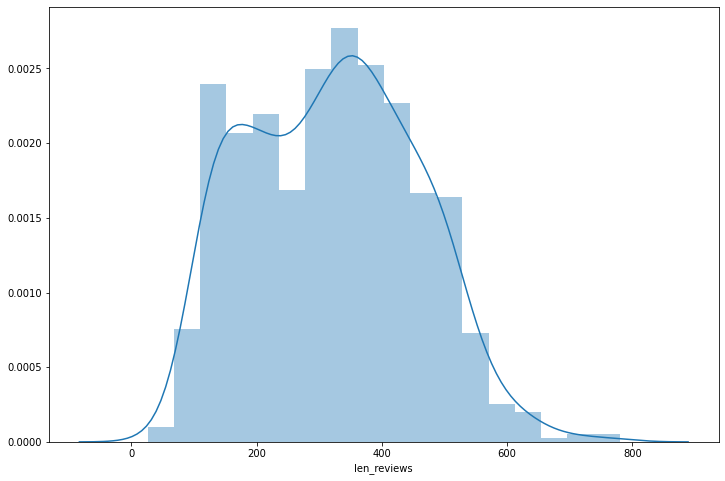

In [ ]:
plt.rcParams['figure.figsize'] = 12,8
sns.distplot(df1['len_reviews'])
plt.show()

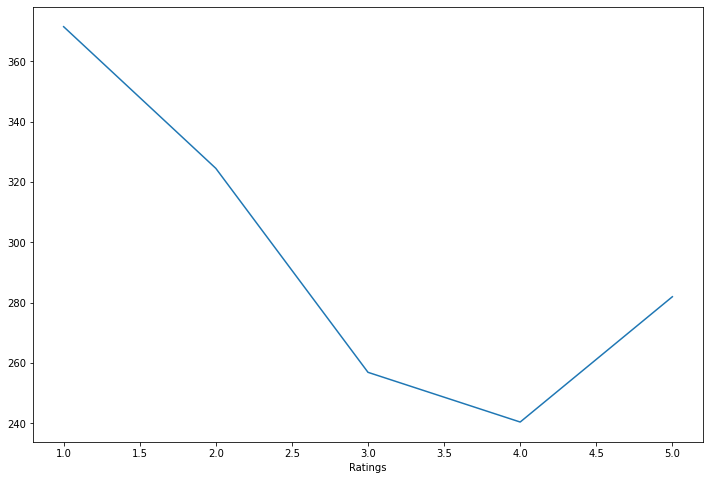

In [ ]:
df1.groupby('Ratings')['len_reviews'].mean().plot()
plt.show()

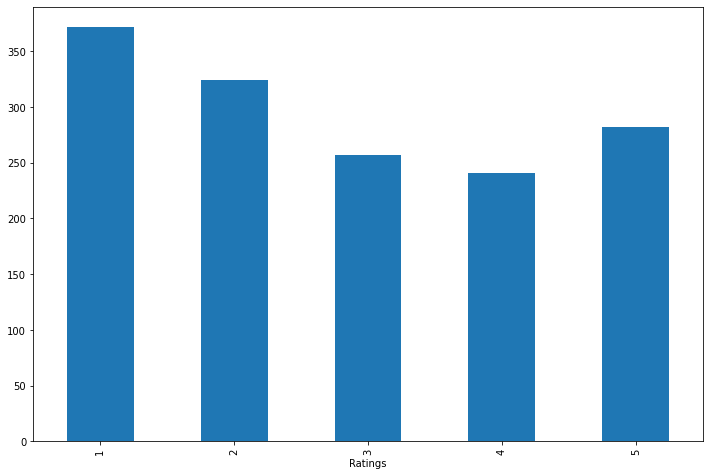

In [ ]:
df1.groupby('Ratings')['len_reviews'].mean().plot(kind = 'bar')
plt.show()

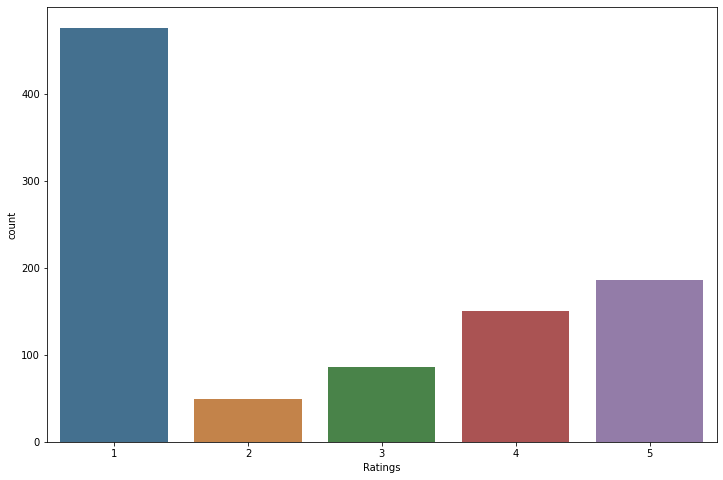

In [ ]:
sns.countplot(x = 'Ratings',data=df1,saturation=0.50)
plt.show()

In [ ]:
## A. TOTAL NUMBER OF WORDS USED 
df1['nb_words'] = df1.Reviews.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
df1['nb_unique_words'] = df1.Reviews.apply(lambda x: len(set(x.split())))

In [ ]:
df1.head()

,Reviews,Ratings,len_reviews,nb_words,nb_unique_words
0,known staff nationwide year always pleasant ex...,5,267,39,38
1,year good family love love roadside assistance...,4,282,45,42
2,changed insurer month get customer service tho...,4,212,29,25
3,great customer service fast claim service ever...,5,171,26,21
4,shopping around nationwide wa quite bit cheape...,5,142,22,20


In [ ]:
df1.columns

Index(['Reviews', 'Ratings', 'len_reviews', 'nb_words', 'nb_unique_words'], dtype='object')

In [ ]:
df1['text_polarity'] = df1['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [ ]:
df1.head()

,Reviews,Ratings,len_reviews,nb_words,nb_unique_words,text_polarity
0,known staff nationwide year always pleasant ex...,5,267,39,38,0.340476
1,year good family love love roadside assistance...,4,282,45,42,0.202797
2,changed insurer month get customer service tho...,4,212,29,25,-0.166667
3,great customer service fast claim service ever...,5,171,26,21,0.250000
4,shopping around nationwide wa quite bit cheape...,5,142,22,20,0.433333


In [ ]:
sid = SentimentIntensityAnalyzer()
df1["sentiments"] = df1["Reviews"].apply(lambda x: sid.polarity_scores(x))
df1 = pd.concat([df1.drop(['sentiments'], axis=1), df1['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
df1.head()

,Reviews,Ratings,len_reviews,nb_words,nb_unique_words,text_polarity,neg,neu,pos,compound
0,known staff nationwide year always pleasant ex...,5,267,39,38,0.340476,0.000,0.588,0.412,0.9625
1,year good family love love roadside assistance...,4,282,45,42,0.202797,0.104,0.428,0.468,0.9786
2,changed insurer month get customer service tho...,4,212,29,25,-0.166667,0.000,0.758,0.242,0.8074
3,great customer service fast claim service ever...,5,171,26,21,0.250000,0.000,0.859,0.141,0.6249
4,shopping around nationwide wa quite bit cheape...,5,142,22,20,0.433333,0.000,0.766,0.234,0.7269


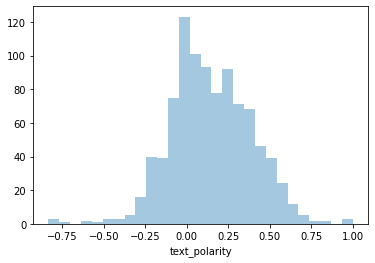

In [ ]:
# sns.distplot((df1['text_polarity']) ,kde = False)
# plt.show()

In [ ]:
df1['Reviews'][2]

'changed insurer month get customer service thought entitled would call previous insurer would get return call representative started saved couple hundred dollar auto home policy switched liberty mutual nationwide'

In [ ]:
corpus = []
for word in df1['Reviews']:
    corpus.append(word) 
corpus = ''.join(corpus)
print(corpus)

known staff nationwide year always pleasant experience almost like family better lol always gone beyond company general ha done especially sarah winchester va area mark dunford agency truly grateful presence able afford fullcoverage rate expertise thank guy see roundyear good family love love roadside assistance prompt beltway rental car covered needed car got fixed took great care taught thing five young kid hit behind sorry showed fake insurance card process wa wa happy learn something new please careful also wish better accident forgivenesschanged insurer month get customer service thought entitled would call previous insurer would get return call representative started saved couple hundred dollar auto home policy switched liberty mutual nationwidegreat customer service fast claim service everything st rate would nt even consider another insurance company one past nt even come close customer nationwide customer lifeshopping around nationwide wa quite bit cheaper file one claim wa ea

In [ ]:
len(corpus)

303378

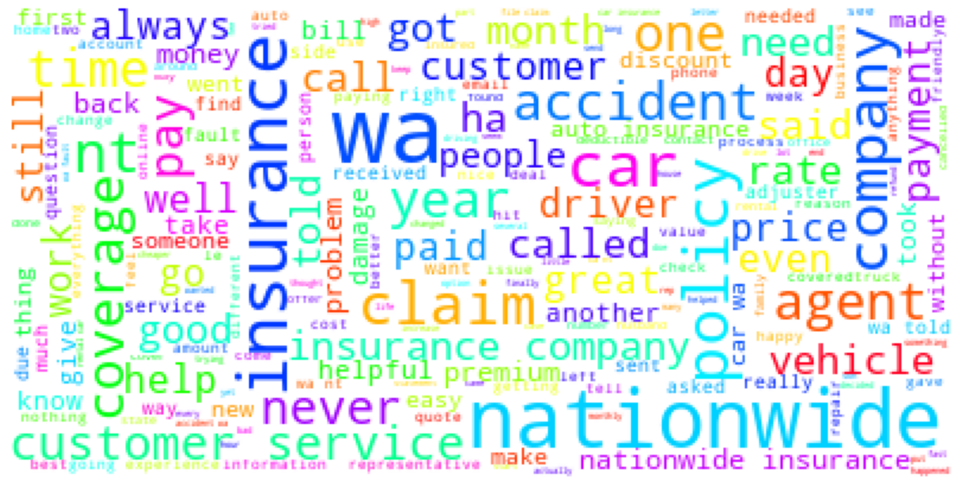

In [ ]:
# plt.rcParams['figure.figsize'] = 14,8

wordcloud = WordCloud().generate(corpus)

wordcloud = WordCloud(background_color="white",max_words=500,\
                      max_font_size=40, relative_scaling=.5, colormap='Wistia').generate(corpus)
plt.figure(figsize=(17,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
WNL = nltk.WordNetLemmatizer()
text = corpus
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
plt.figure( figsize=(12,12))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 3000
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear',cmap = 'Wistia')
plt.axis("off")
plt.show()

NameError: ignored

In [ ]:
df1.shape

(947, 10)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df1,df1['Ratings'],test_size = 0.2,stratify=df1['Ratings'])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(757, 10)
(190, 10)
(757,)
(190,)
